In [ ]:
## importing needed packages -- if something stops working uncomment and run
!pip install astroquery
!pip install emcee
!pip install multiprocess
!pip install galpy
!pip install corner

In [ ]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal as signal
from astropy.io import fits
from astroquery.vizier import Vizier
import pandas as pd
import numpy.random as random
import emcee
import corner
import random
import math as math
from math import cos, sin
from astropy.coordinates import SkyCoord

In [ ]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as random
import emcee
import corner
import random
import os
import math as math

import scipy.integrate as integrate
from scipy import optimize

import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as units
import galpy.util.bovy_coords as bc

from multiprocess import Pool
os.environ["OMP_NUM_THREADS"] = "1"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
plt.rcParams['lines.linewidth']   =3
plt.rcParams['axes.linewidth']    = 2
plt.rcParams['xtick.major.width'] =2
plt.rcParams['ytick.major.width'] =2
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelweight']='semibold'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.titlesize']=9

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
data =pickle.load(open("finalkoiTestSet.pkl","rb"))
data

,RA,DEC,pmra,pmdec,plx,gmagFlux,gmagFluxErr,gmagNobs,expectedPoissonErr,expectedPoisNobsErr,poissonErrDiff,poisNobsErrDiff
0,290.440643,38.523571,-4.153693,2.269135,3.056519,169065.906250,101.425781,260.0,411.176239,25.500069,-309.750458,75.925713
1,290.469208,38.202011,-2.648280,0.423162,3.036035,476.102234,1.382913,208.0,21.819767,1.512929,-20.436853,-0.130016
2,290.612457,38.027657,-4.785545,-3.169229,3.061187,67342.195312,13.353397,255.0,259.503754,16.250755,-246.150345,-2.897358
3,289.807831,38.950420,-4.066180,2.117736,3.023645,878987.000000,311.861145,255.0,937.543030,58.711224,-625.681885,253.149933
4,291.280182,39.200703,-2.448428,0.134584,3.055210,33719.300781,9.029584,215.0,183.628159,12.523336,-174.598572,-3.493752
...,...,...,...,...,...,...,...,...,...,...,...,...
3559,280.841064,43.464012,-5.504663,6.544557,3.055735,4491.558594,7.520109,160.0,67.019096,5.298325,-59.498985,2.221784
3560,298.538727,44.874695,-2.697397,-0.507709,3.055360,647.757568,1.208700,237.0,25.451082,1.653225,-24.242382,-0.444525
3561,298.180359,41.626228,-2.673796,-1.288487,2.798487,1735.759766,5.554786,237.0,41.662449,2.706267,-36.107662,2.848519
3562,299.488098,33.760445,-0.667874,1.677112,3.154913,252.941864,2.645207,169.0,15.904146,1.223396,-13.258939,1.421811


In [ ]:
rerun = 0
file = (r'C:\Users\sharavu\Documents\Astro 519\Astro final project\finalkoiTestSet.pkl')
neighbors = pd.read_pickle(file)
neighbors


FileNotFoundError: ignored

In [ ]:
rerun=0
if rerun == 1:
    from astroquery.mast import Catalogs
    from astroquery.gaia import Gaia

    ## read in the information. We need:
    ## RA, Dec, plx, eplx, RV, eRV, pmra, epmra, pmdec, epmdec

    sigmaG_0 = 0.0027553202
    sigmaGBP_0 = 0.0027901700
    sigmaGRP_0 = 0.0037793818 

    ra = neighbors['RA'].values
    dec = neighbors['DEC'].values
    Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source"
    g = []
    g_err = []
    bp = []
    bp_err = []
    rp = []
    rp_err = []
    plx = []
    eplx = []
    pmra = []
    epmra = []
    pmdec = []
    epmdec = []
    ruwe = []
    ii = 0
    v = Vizier(columns=["*", "+_r"], catalog="II/246")
    rad = "6s"
    width = u.Quantity(0.001, u.deg)
    height = u.Quantity(0.001, u.deg)
    print('Running',np.size(ra),'targets through Gaia')
    for r,d in zip(ra,dec):

        coord = SkyCoord(ra=r, dec=d, unit=(u.degree, u.degree), frame='icrs')
        catalog_data = Gaia.query_object_async(coordinate=coord, width=width, height=height,verbose=False)
        if np.size(catalog_data) >= 1:
            bp = np.append(bp,catalog_data['phot_bp_mean_mag'][0])
            bp_err = np.append(bp_err,(np.sqrt((-2.5/np.log(10)*catalog_data['phot_bp_mean_flux_error']/catalog_data['phot_bp_mean_flux'])**2 + sigmaG_0**2))[0])
            g = np.append(g,catalog_data['phot_g_mean_mag'][0])
            g_err = np.append(g_err,(np.sqrt((-2.5/np.log(10)*catalog_data['phot_g_mean_flux_error']/catalog_data['phot_g_mean_flux'])**2 + sigmaG_0**2))[0])
            rp = np.append(rp,catalog_data['phot_rp_mean_mag'][0])
            rp_err = np.append(rp_err,(np.sqrt((-2.5/np.log(10)*catalog_data['phot_rp_mean_flux_error']/catalog_data['phot_rp_mean_flux'])**2 + sigmaG_0**2))[0])
            plx = np.append(plx,catalog_data['parallax'][0])
            eplx = np.append(eplx,catalog_data['parallax_error'][0])
            ruwe = np.append(ruwe,catalog_data['ruwe'][0])
            pmra = np.append(pmra,catalog_data['pmra'][0])
            epmra = np.append(epmra,catalog_data['pmra_error'][0])
            pmdec = np.append(pmdec,catalog_data['pmdec'][0])
            epmdec = np.append(epmdec,catalog_data['pmdec_error'][0])


    print(np.shape(pmra),np.shape(neighbors),np.shape(neighbors['Vrerr']))
    df = pd.DataFrame({"G":g,"G_err":g_err,"BP":bp,"BP_err":bp_err,"RP":rp,"RP_err":rp_err,
                          "plx":plx,"eplx":eplx,"ruwe":ruwe,"ra":ra,"dec":dec,
                          "rv":neighbors['Vr(obs)'],"rv_err":neighbors['Vrerr'],"pmra":pmra,"pmra_err":epmra,"pmdec":pmdec,"pmdec_err":epmdec,
                          })
    df.to_pickle("finalkoiTestSet.pkl")
    

3564


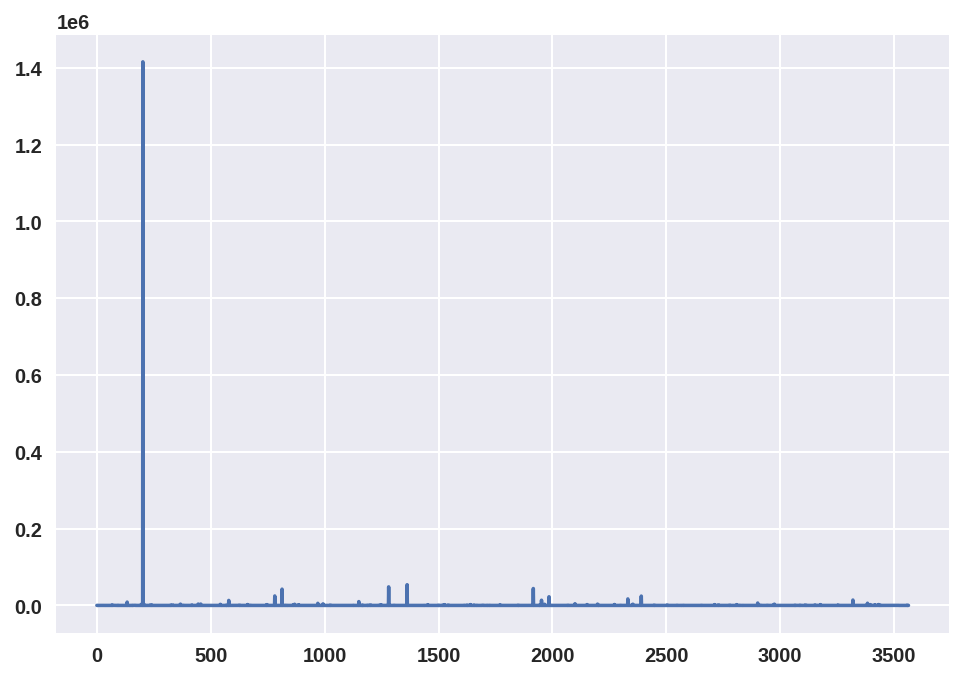

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

# NOTE: I am starting with the GMM Jupyter Notebook from class and then altering it as needed. I would start with the other one Dr. Mann sent but it would take 
# me like 30 years to figure out what any of that code means. So I won't for now. 

# We choose to look at proper motion ra, proper motion dec, and also photometric variability. This is based on the random forest + orth. param
# ran and the fact that 

y= data["poisNobsErrDiff"] # here I want the data for whatever paramter is being investigated. Vg is one of them for example. 
print(len(y))
x=np.arange(0,3564)
from sklearn.mixture import GaussianMixture as GMM
plt.plot(x,y)
X=np.zeros((3564,3564))
X=y[:, np.newaxis]
clf = GMM(4, max_iter=1000, random_state=3).fit(X)

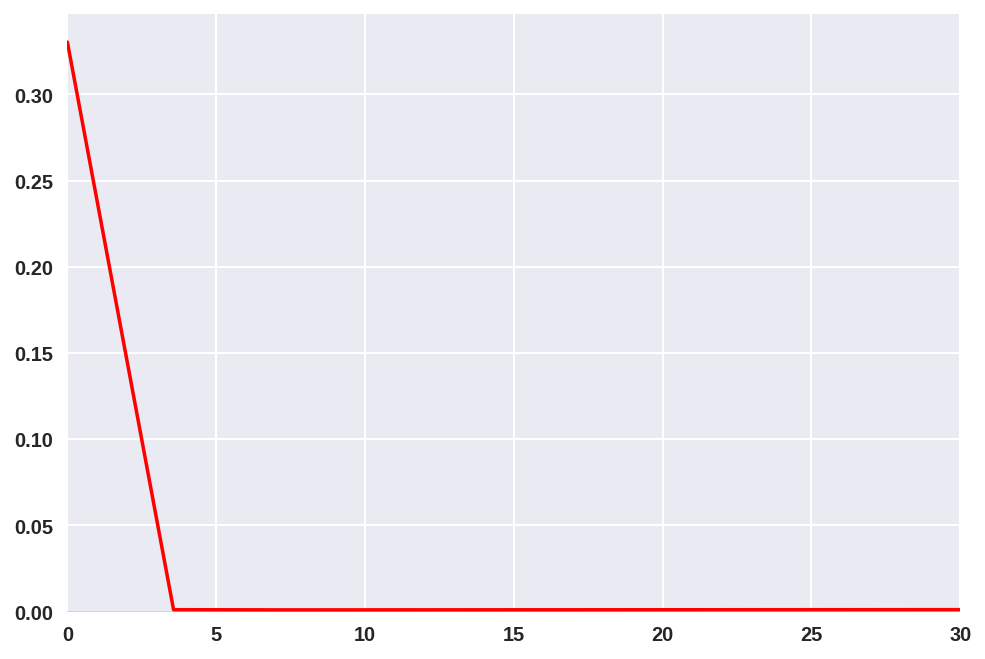

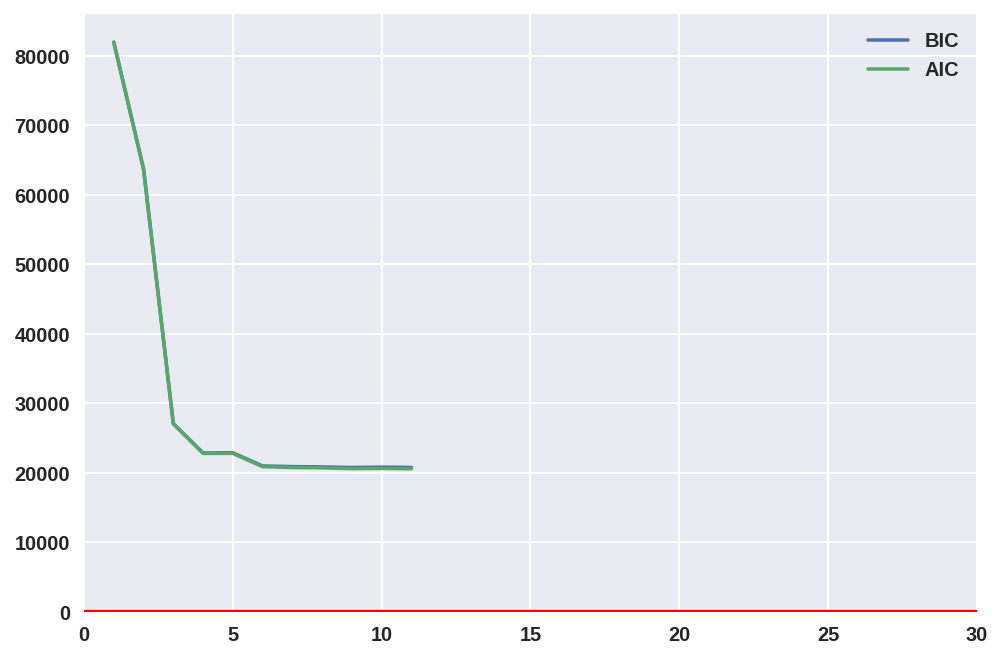

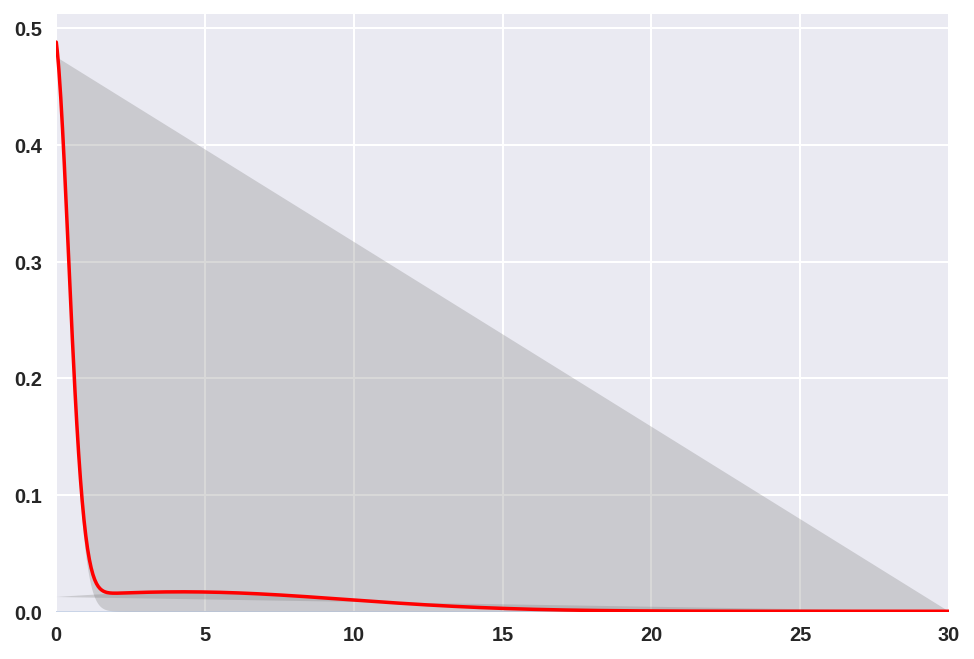

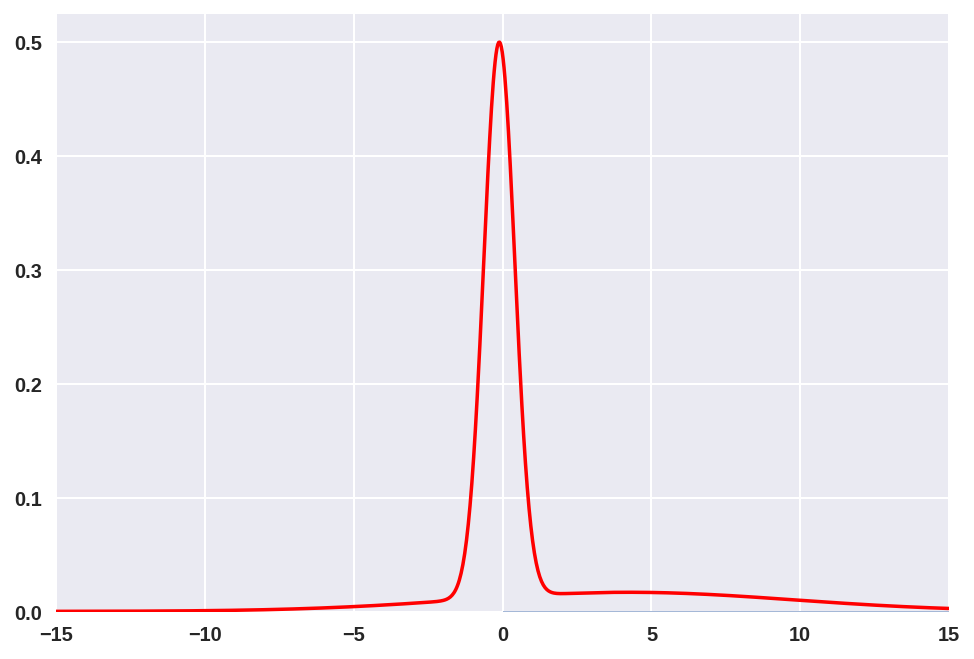

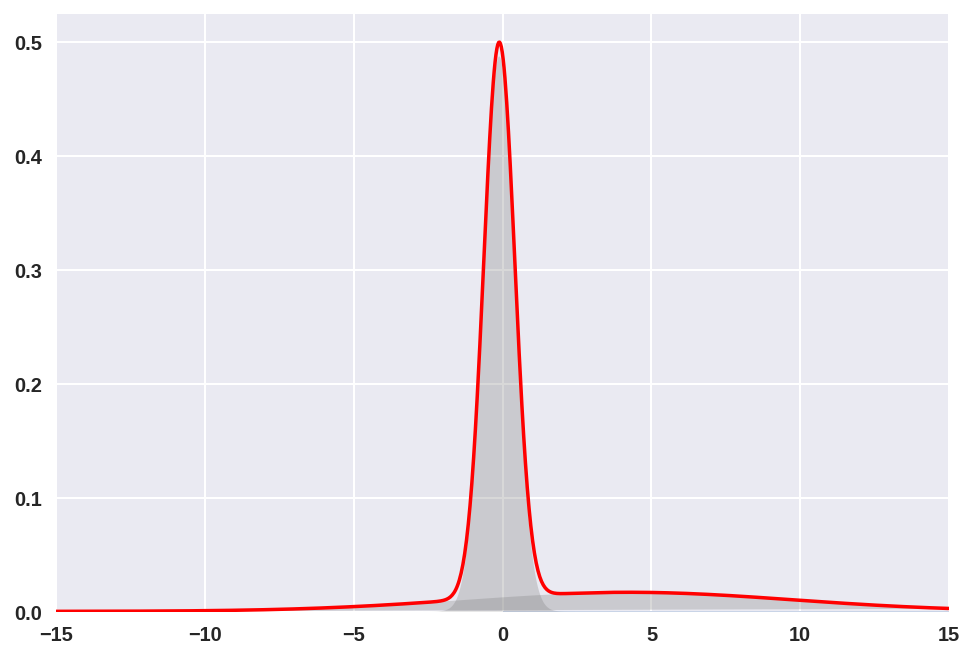

0.02888982621780529


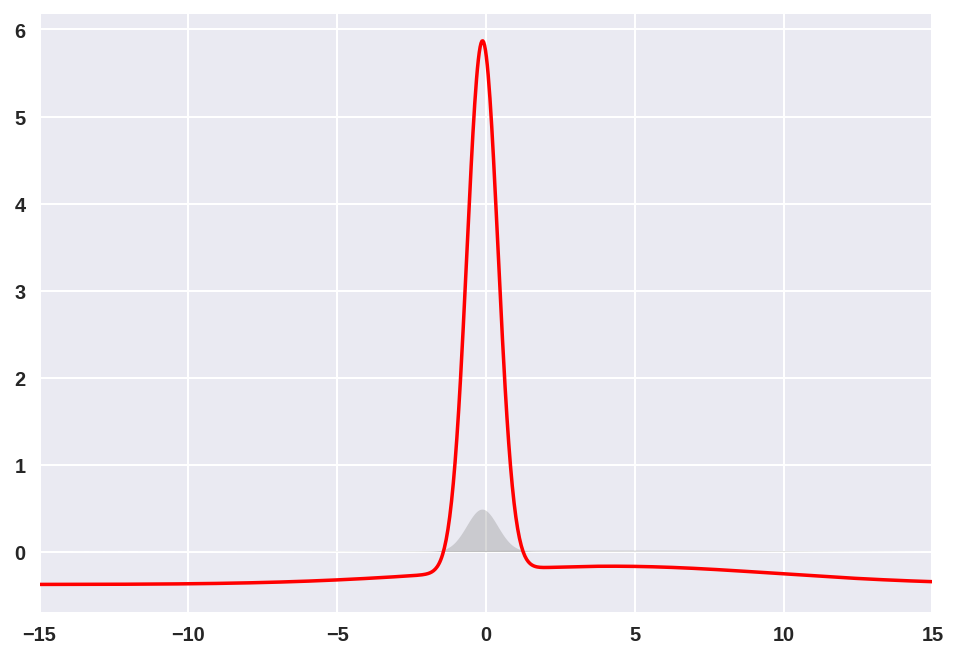

0.08411222537423979


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

# NOTE: I am starting with the GMM Jupyter Notebook from class and then altering it as needed. I would start with the other one Dr. Mann sent but it was taking me 
# me like 30 years to figure out what any of that code means. So I won't for now. 

# We choose to look at proper motion ra, proper motion dec, and also photometric variability. This is based on the random forest + orth. param
# ran and the fact that 


xpdf = np.linspace(0, 3564, 1000) # alter this range based on axis/paramter
density = np.array([np.exp(clf.score([[xp]])) for xp in xpdf])

plt.hist(x, 80, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')
plt.xlim(0,30)
plt.show()
for i in range(clf.n_components): 
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0, 30); # better define this range as well

n_estimators = np.arange(1, 12)   # determining number of Gaussians to fit with for each parameter
clfs = [GMM(n, max_iter=5000).fit(X) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

# After these curves are printed for each parameter, I want to add them with some weights. Start with initial guesses for these. Then can zone in 
#on them with help of random forest. 

from sklearn.mixture import GaussianMixture as GMM
clf1 = GMM(8, max_iter=500, random_state=3).fit(X)
xpdf = np.linspace(0, 30, 1000)
density = np.array([np.exp(clf1.score([[xp]])) for xp in xpdf])
plt.hist(x, 80, density=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(0, 30);
plt.show()

plt.hist(x, 80, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')

for i in range(clf1.n_components):
    pdf = clf1.weights_[i] * stats.norm(clf1.means_[i, 0],
                                       np.sqrt(clf1.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0, 30);
plt.show()

from sklearn.mixture import GaussianMixture as GMM
clf1 = GMM(8, max_iter=500, random_state=3).fit(X)
xpdf = np.linspace(-15, 15, 1000)
density = np.array([np.exp(clf1.score([[xp]])) for xp in xpdf])
plt.hist(x, 80, density=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-15, 15);
plt.show()

plt.hist(x, 80, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')

for i in range(clf1.n_components):
    pdf = clf1.weights_[i] * stats.norm(clf1.means_[i, 0],
                                       np.sqrt(clf1.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-15, 15);
plt.show()

# subtracting mean and dividing by standard deviation, Note that in all these plots, 
#only the x values larger than 0 mean anything. They correspond to the index values of the stars. 
# The other values are numerical. 
#means=clf.means_
#sum=0
#count=0
#for i in means:
  #sum+=i
  #count+=1
#print(sum/count)
print(np.mean(density))
plt.plot(xpdf, (density-.03)/.08, '-r')

for i in range(clf1.n_components):
    pdf = clf1.weights_[i] * stats.norm(clf1.means_[i, 0],
                                       np.sqrt(clf1.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-15, 15);
plt.show()
print(np.std(density))

3564


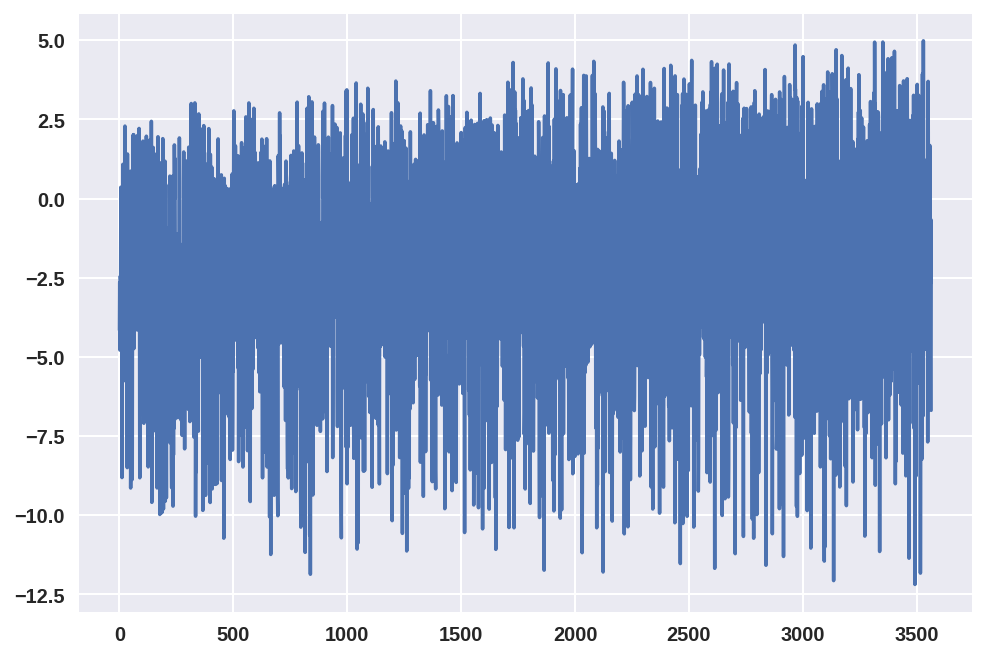

In [ ]:
y1= data["pmra"] # here I want the data for whatever paramter is being investigated. Vg is one of them for example. 
print(len(y1))
x1=np.arange(0,3564)
from sklearn.mixture import GaussianMixture as GMM
plt.plot(x1,y1)
X1=np.zeros((3564,3564))
X1=y1[:, np.newaxis]
clf2 = GMM(4, max_iter=1000, random_state=3).fit(X1)


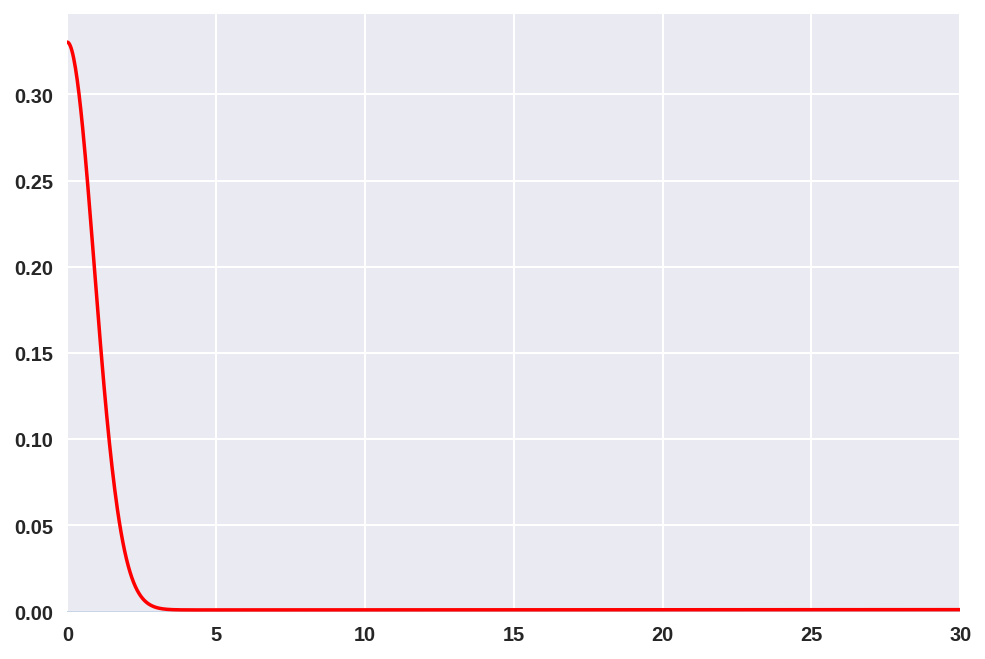

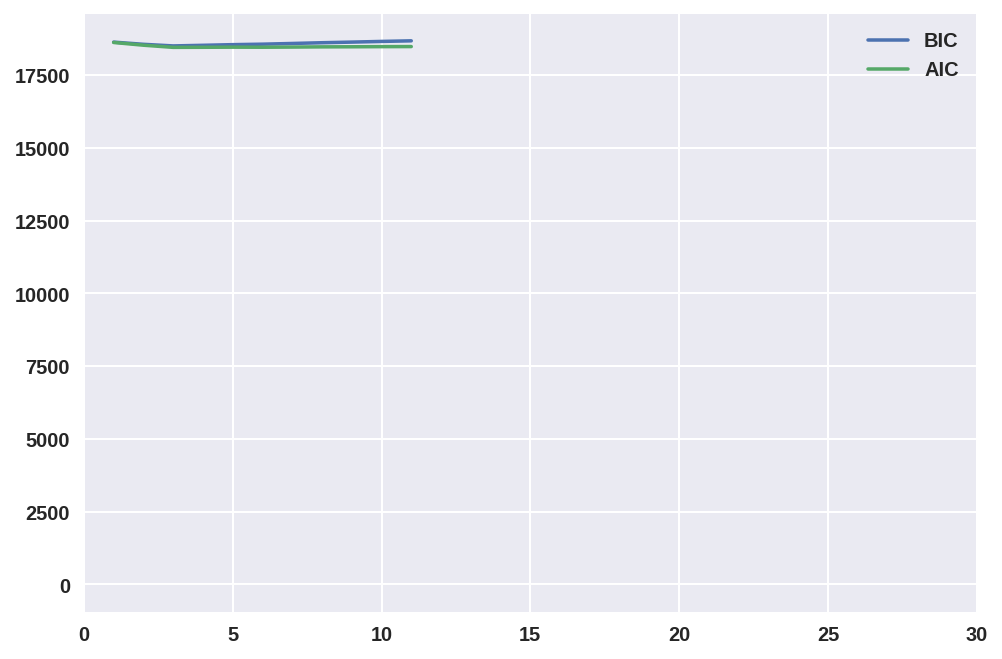

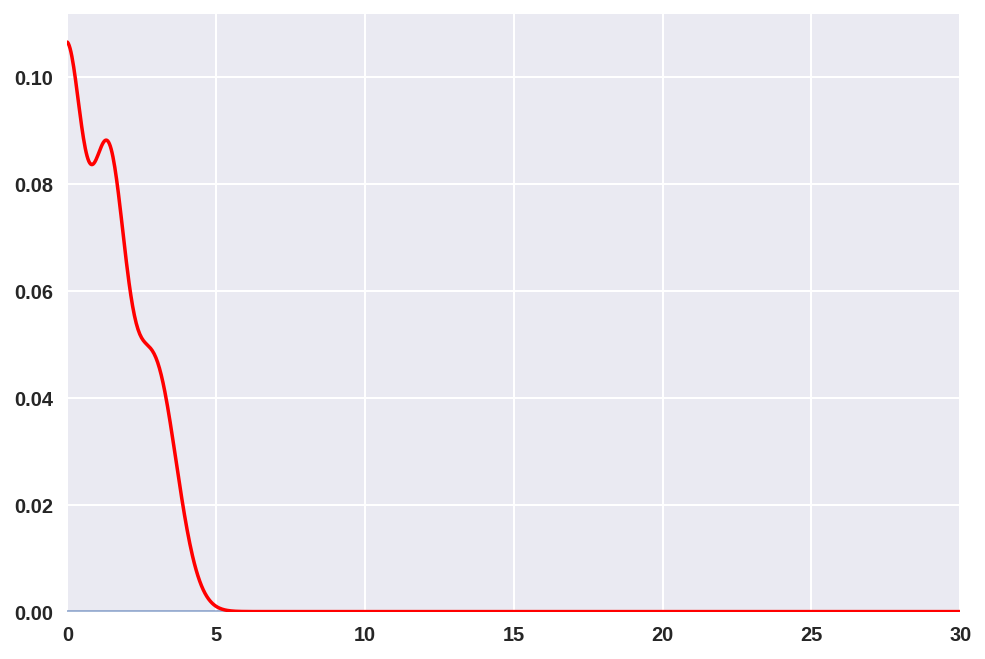

0.008913347449105116


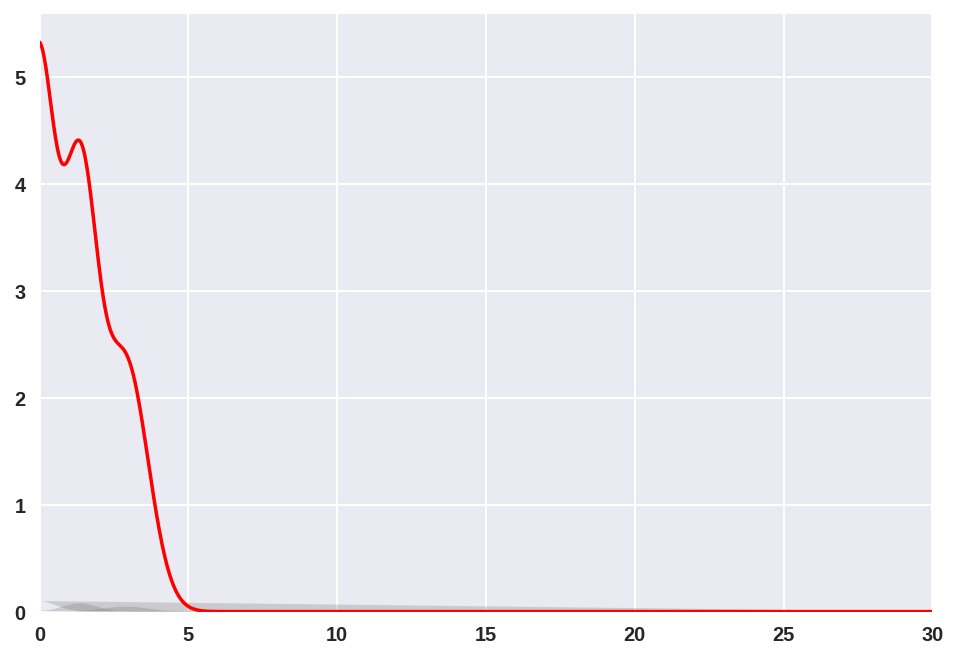

0.023884100906399787


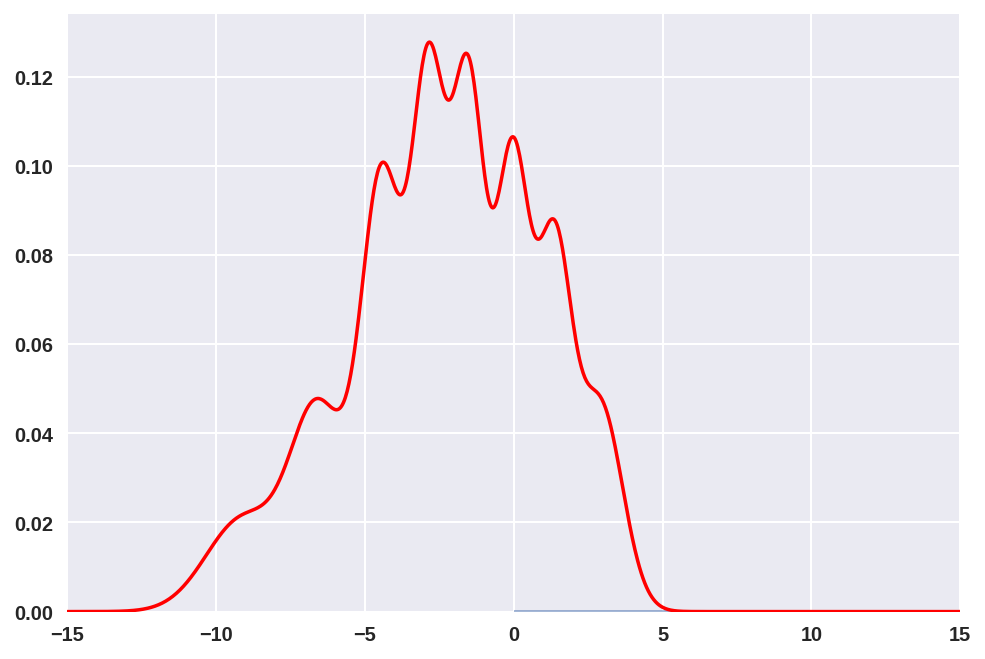

0.03329999785636781


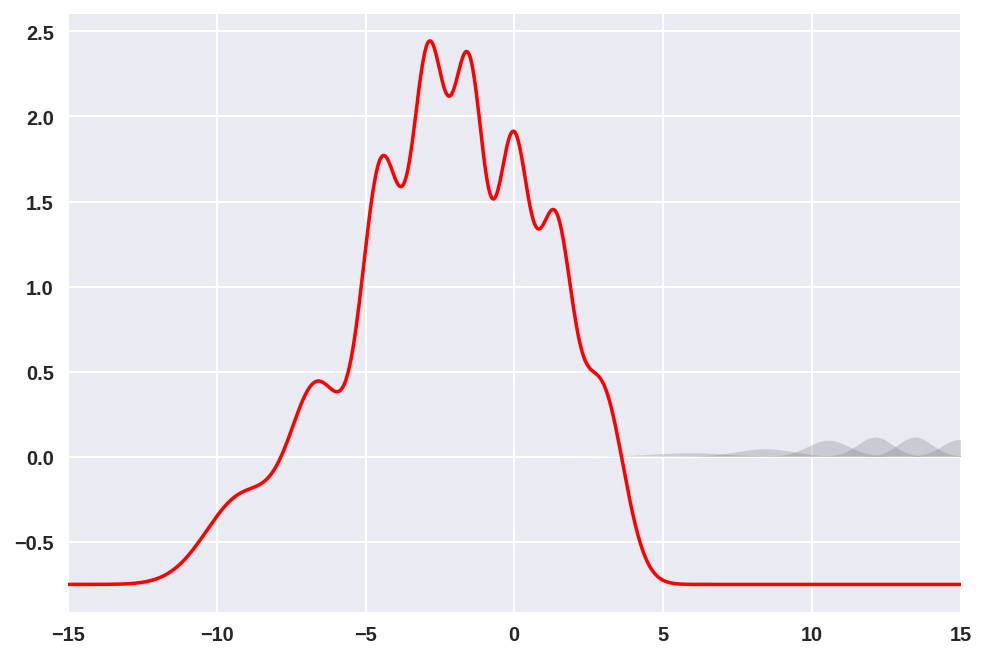

0.04169922950786034


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

# NOTE: I am starting with the GMM Jupyter Notebook from class and then altering it as needed. I would start with the other one Dr. Mann sent but it was taking me 
# me like 30 years to figure out what any of that code means. So I won't for now. 

# We choose to look at proper motion ra, proper motion dec, and also photometric variability. This is based on the random forest + orth. param
# ran and the fact that 


xpdf = np.linspace(0,30,1000) # alter this range based on axis/paramter
density = np.array([np.exp(clf.score([[xp]])) for xp in xpdf])

plt.hist(x1, 80, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')
plt.xlim(0,30)
plt.show()

for i in range(clf.n_components): 
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0,30); # better define this range as well

n_estimators = np.arange(1, 12)   # determining number of Gaussians to fit with for each parameter
clfs = [GMM(n, max_iter=5000).fit(X1) for n in n_estimators]
bics = [clf.bic(X1) for clf in clfs]
aics = [clf.aic(X1) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();
plt.xlim(0,30)
plt.show()

# After these curves are printed for each parameter, I want to add them with some weights. Start with initial guesses for these. Then can zone in 
#on them with help of random forest. 

from sklearn.mixture import GaussianMixture as GMM
clf2 = GMM(8, max_iter=500, random_state=3).fit(X1)
xpdf1 = np.linspace(0, 30, 1000)
density = np.array([np.exp(clf2.score([[xp]])) for xp in xpdf1])
plt.hist(x1, 80, density=True, alpha=0.5)
plt.plot(xpdf1, density, '-r')
plt.xlim(0, 30);
plt.show()
print(np.mean(density))
plt.hist(x1, 80, alpha=0.3,density=True)
plt.plot(xpdf1, density/.02, '-r')

for i in range(clf2.n_components):
    pdf = clf2.weights_[i] * stats.norm(clf2.means_[i, 0],
                                       np.sqrt(clf2.covariances_[i, 0])).pdf(xpdf1)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0, 30);
plt.show()


print(np.std(density))


from sklearn.mixture import GaussianMixture as GMM
clf2 = GMM(8, max_iter=500, random_state=3).fit(X1)
xpdf1 = np.linspace(-15, 15, 1000)
density = np.array([np.exp(clf2.score([[xp]])) for xp in xpdf1])
plt.hist(x1, 80, density=True, alpha=0.5)
plt.plot(xpdf1, density, '-r')
plt.xlim(-15, 15);
plt.show()
print(np.mean(density))
plt.hist(x1, 80, alpha=0.3,density=True)
plt.plot(xpdf1, (density-.03)/.04, '-r')

for i in range(clf2.n_components):
    pdf = clf2.weights_[i] * stats.norm(clf2.means_[i, 0],
                                       np.sqrt(clf2.covariances_[i, 0])).pdf(xpdf1)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-15, 15);
plt.show()


print(np.std(density))


3564


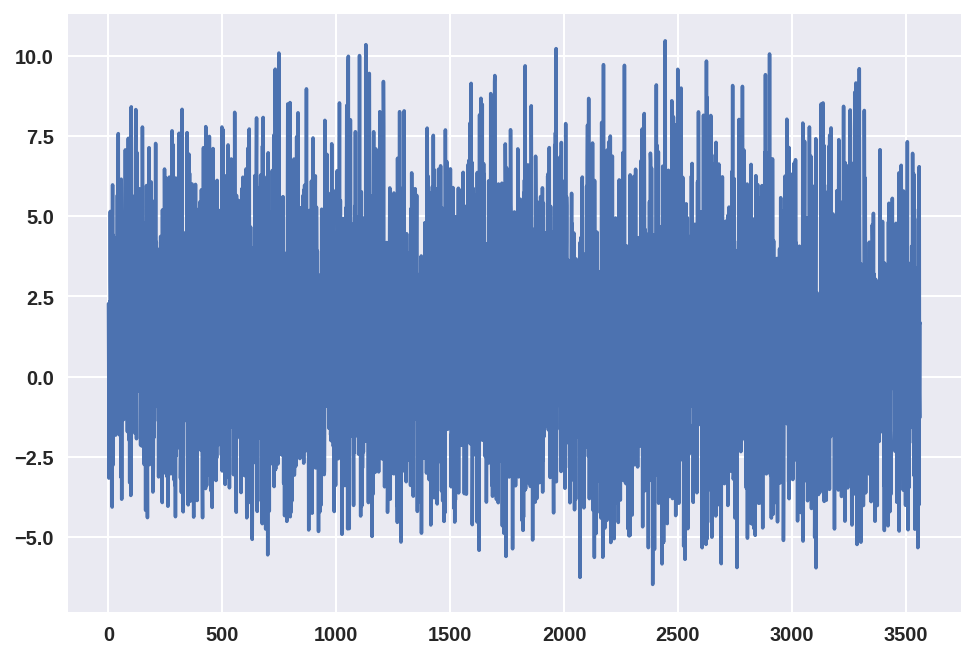

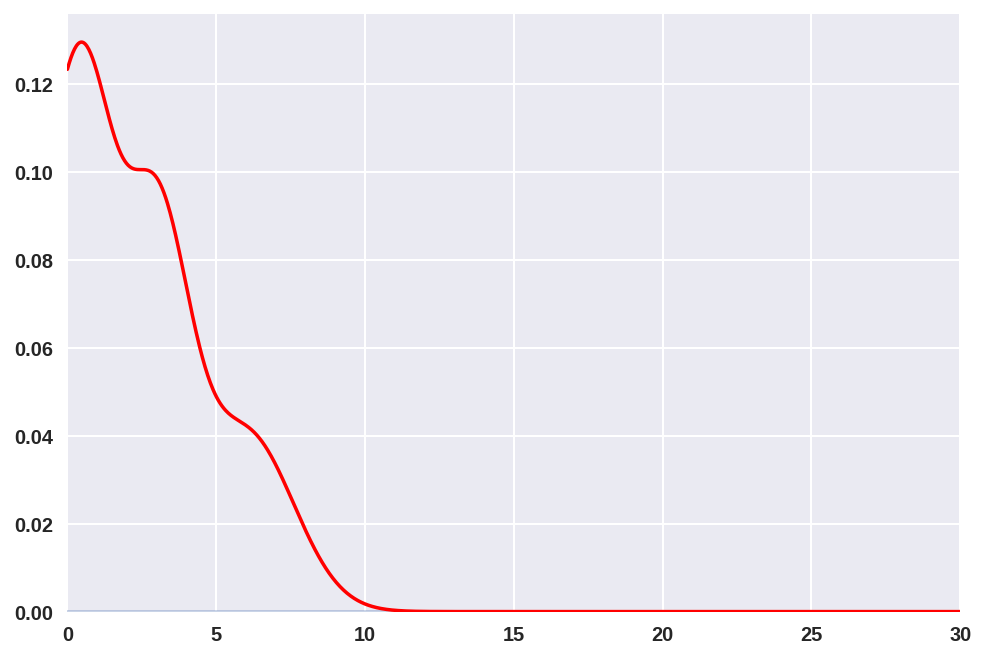

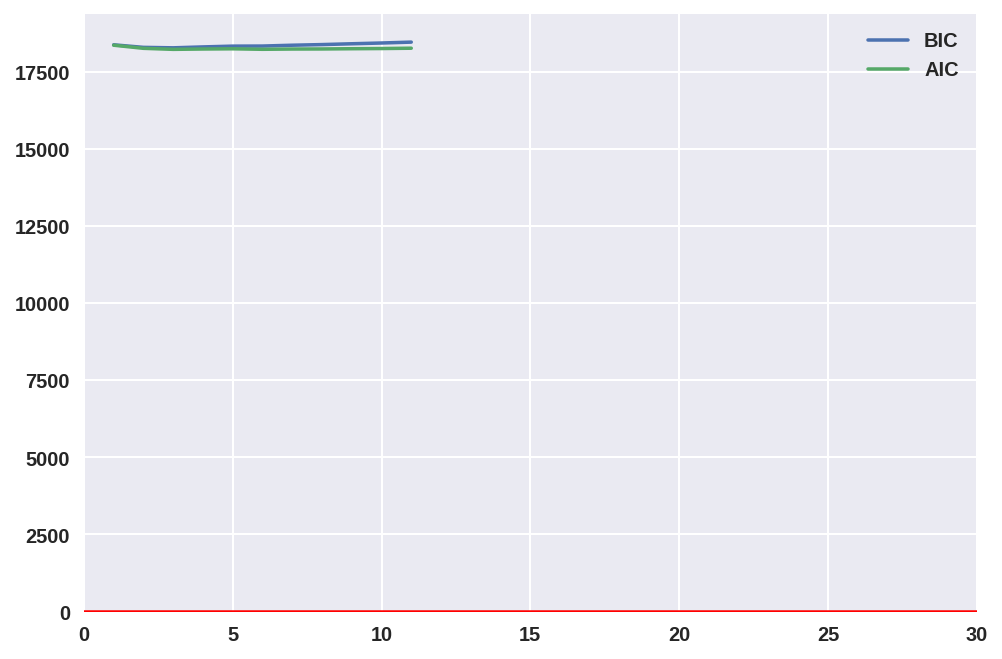

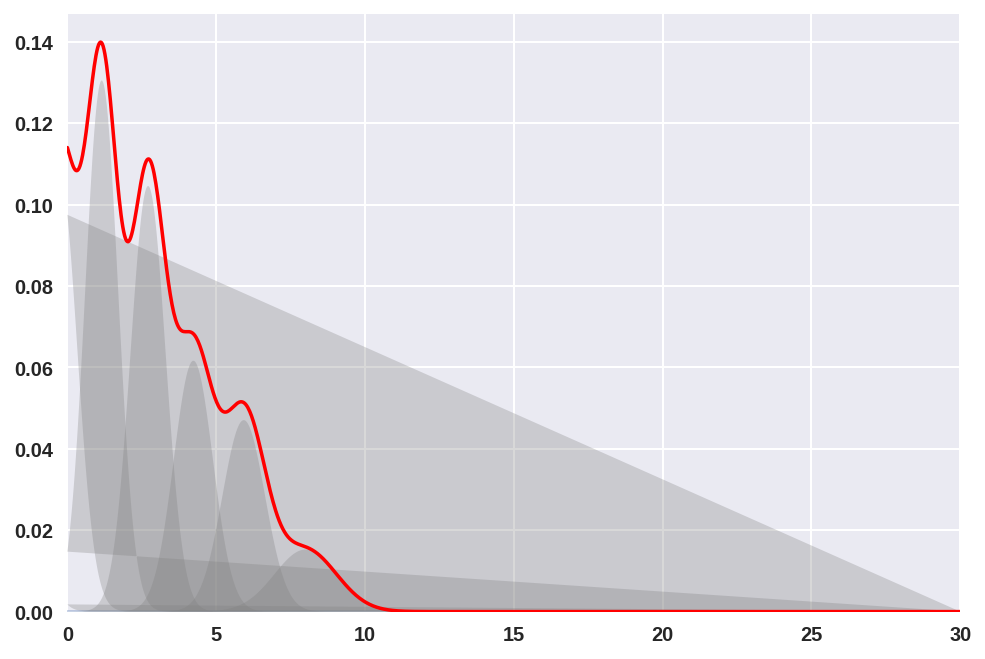

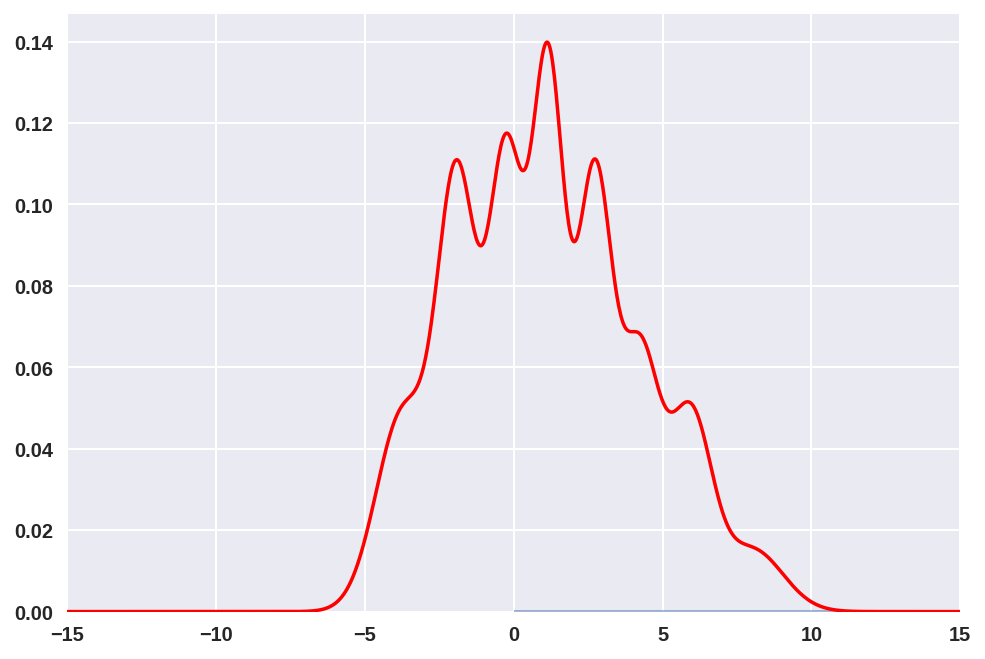

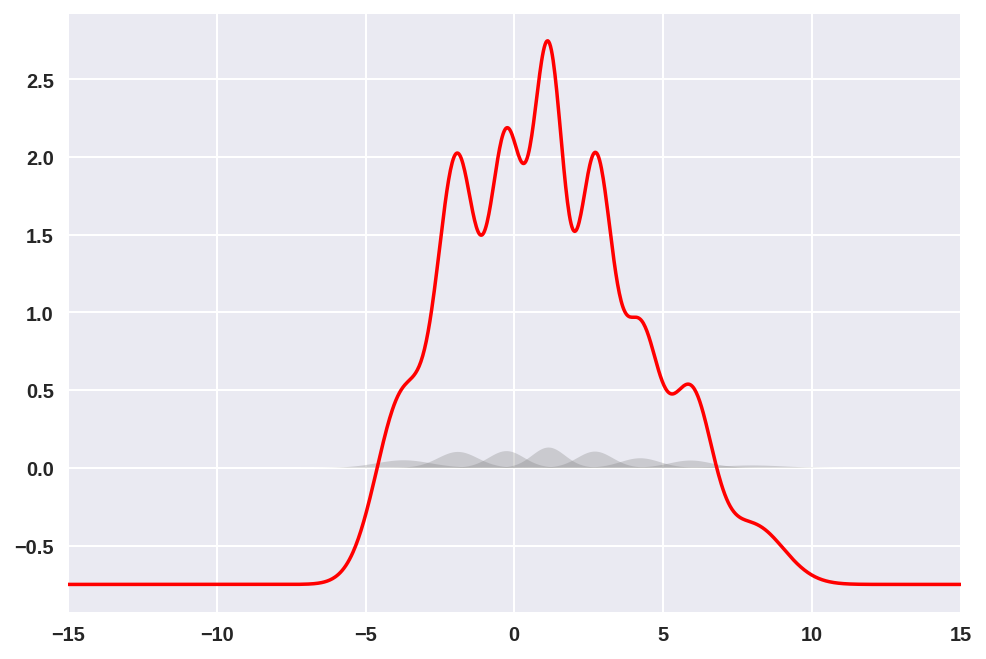

0.04265064199576929
0.03329999999999011


In [ ]:
y2= data["pmdec"] # here I want the data for whatever paramter is being investigated. Vg is one of them for example. 
print(len(y2))
x2=np.arange(0,3564)
from sklearn.mixture import GaussianMixture as GMM
plt.plot(x2,y2)
plt.show()
X2=np.zeros((3564,3564))
X2=y2[:, np.newaxis]
clf = GMM(4, max_iter=1000, random_state=3).fit(X2)


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

# NOTE: I am starting with the GMM Jupyter Notebook from class and then altering it as needed. I would start with the other one Dr. Mann sent but it was taking me 
# me like 30 years to figure out what any of that code means. So I won't for now. 

# We choose to look at proper motion ra, proper motion dec, and also photometric variability. This is based on the random forest + orth. param
# ran and the fact that 


xpdf = np.linspace(0,30,1000) # alter this range based on axis/paramter
density = np.array([np.exp(clf.score([[xp]])) for xp in xpdf])

plt.hist(x2, 80, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')
plt.xlim(0,30)
plt.show()

for i in range(clf.n_components): 
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0, 30); # better define this range as well

n_estimators = np.arange(1, 12)   # determining number of Gaussians to fit with for each parameter
clfs = [GMM(n, max_iter=5000).fit(X2) for n in n_estimators]
bics = [clf.bic(X2) for clf in clfs]
aics = [clf.aic(X2) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

from sklearn.mixture import GaussianMixture as GMM
clf3 = GMM(8, max_iter=500, random_state=3).fit(X2)
xpdf2 = np.linspace(0, 30, 1000)
density = np.array([np.exp(clf3.score([[xp]])) for xp in xpdf2])
plt.hist(x2, 80, density=True, alpha=0.5)
plt.plot(xpdf2, density, '-r')
plt.xlim(0, 30);
plt.show()

plt.hist(x2, 80, alpha=0.3,density=True)
plt.plot(xpdf2, density, '-r')

for i in range(clf3.n_components):
    pdf = clf3.weights_[i] * stats.norm(clf3.means_[i, 0],
                                       np.sqrt(clf3.covariances_[i, 0])).pdf(xpdf2)
    plt.fill(xpdf2, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0, 30);
plt.show()

from sklearn.mixture import GaussianMixture as GMM
clf3 = GMM(8, max_iter=500, random_state=3).fit(X2)
xpdf2 = np.linspace(-15, 15, 1000)
density = np.array([np.exp(clf3.score([[xp]])) for xp in xpdf2])
plt.hist(x2, 80, density=True, alpha=0.5)
plt.plot(xpdf2, density, '-r')
plt.xlim(-15, 15);
plt.show()

plt.hist(x2, 80, alpha=0.3,density=True)
plt.plot(xpdf2, (density-.03)/.04, '-r')

for i in range(clf3.n_components):
    pdf = clf3.weights_[i] * stats.norm(clf3.means_[i, 0],
                                       np.sqrt(clf3.covariances_[i, 0])).pdf(xpdf2)
    plt.fill(xpdf2, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-15, 15);
plt.show()
print(np.std(density))
print(np.mean(density))

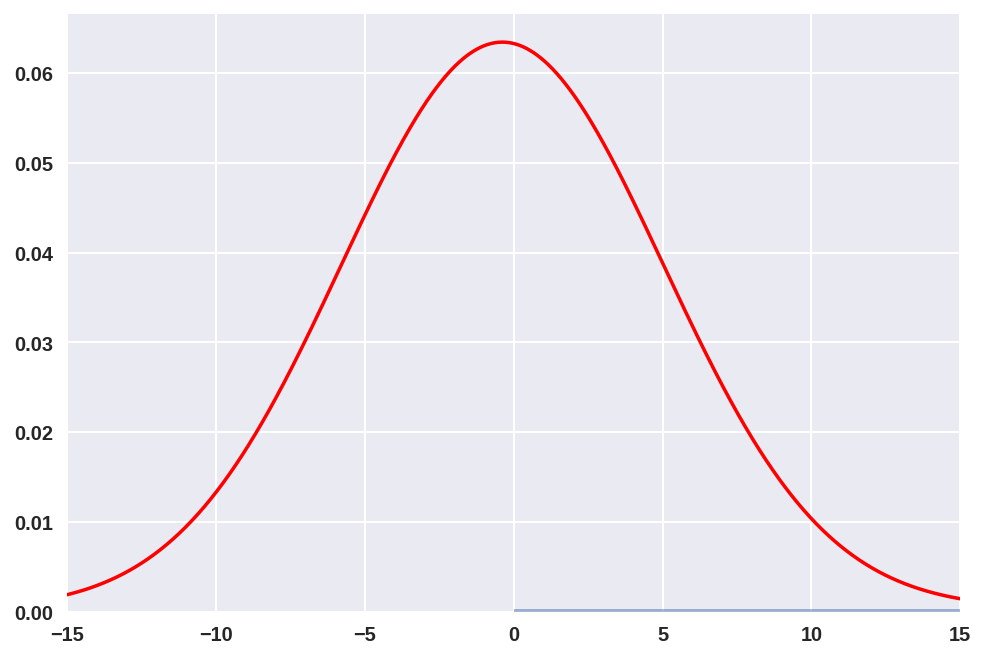

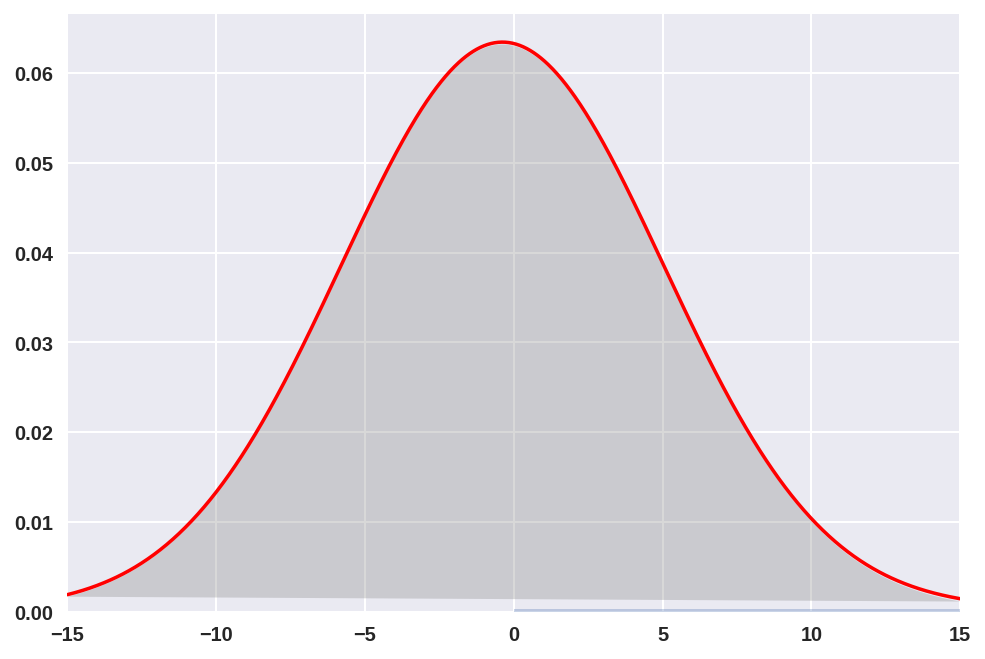

In [ ]:
# Summing all three curves (from the three different parameters) (each made w/8 Gaussians)
# trying a variety of weights on them from 0 to 1
# then comparing with random forest to see which combo of weights is best -- represents relevance of parameters the best
from sklearn.mixture import GaussianMixture as GMM
clft = clf3 = GMM(8, max_iter=500, random_state=3).fit(X+X1+X2)
xpdf2 = np.linspace(-15, 15, 1000)
density = np.array([np.exp(clft.score([[xp]])) for xp in xpdf2])
plt.hist(x2, 80, density=True, alpha=0.5)
plt.plot(xpdf2, density, '-r')
plt.xlim(-15, 15);
plt.show()

plt.hist(x2, 80, alpha=0.3,density=True)
plt.plot(xpdf2, density, '-r')

for i in range(clft.n_components):
    pdf = clft.weights_[i] * stats.norm(clft.means_[i, 0],
                                       np.sqrt(clft.covariances_[i, 0])).pdf(xpdf2)
    plt.fill(xpdf2, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-15, 15);
plt.show()
## NOW I STILL NEED TO SUM THE NORMALIZED FUNCTIONS. THIS IS A SUM OF THE NON-NORMALIZED FUNCTIONS. 


3564


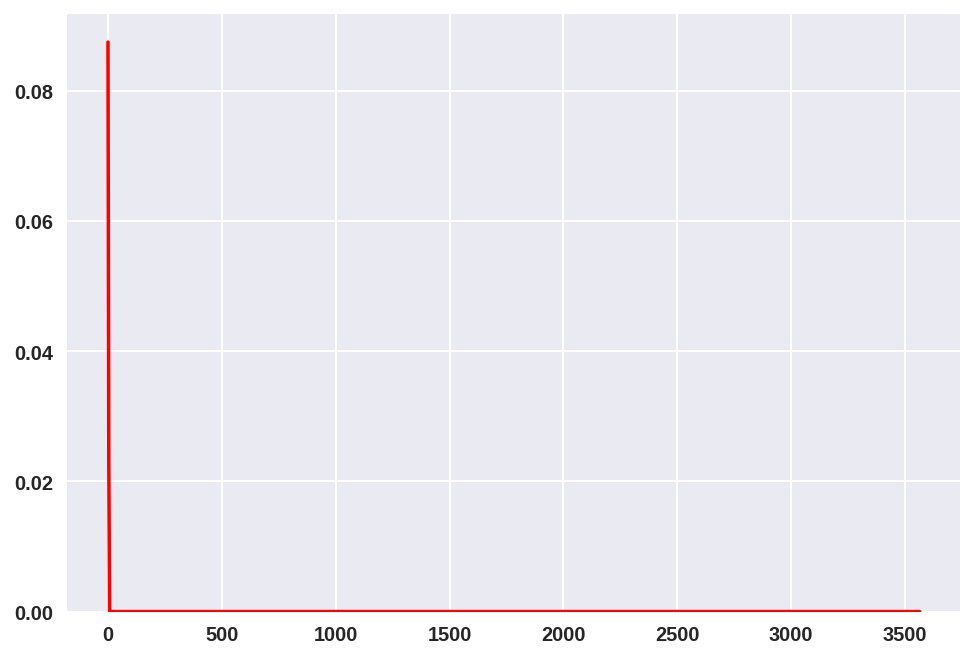

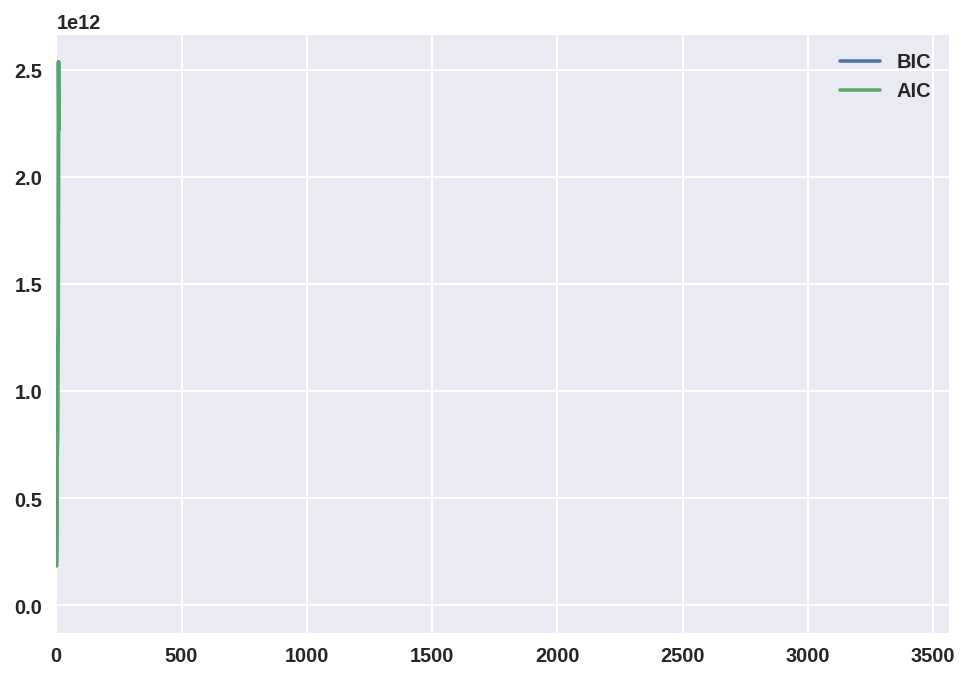

In [ ]:
# everything below this is scratch/previous code for now -- just not deleting yet -- actually it's all bad code now hehe can delete

y2= data["pmdec"] # here I want the data for whatever paramter is being investigated. Vg is one of them for example. 
print(len(y2))
x=np.arange(0,3564)
from sklearn.mixture import GaussianMixture as GMM
plt.plot(x,y1)
X1=np.zeros((3564,3564))
X1=y1[:, np.newaxis]
clf = GMM(4, max_iter=1000, random_state=3).fit(X1)


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

# NOTE: I am starting with the GMM Jupyter Notebook from class and then altering it as needed. I would start with the other one Dr. Mann sent but it would take 
# me like 30 years to figure out what any of that code means. So I won't for now. 

# We choose to look at proper motion ra, proper motion dec, and also photometric variability. This is based on the random forest + orth. param
# ran and the fact that 


xpdf = np.linspace(0, 3564, 1000) # alter this range based on axis/paramter
density = np.array([np.exp(clf.score([[xp]])) for xp in xpdf])

plt.hist(x, 45, alpha=0.3,density=True)
plt.plot(xpdf, density, '-r')
plt.show()
for i in range(clf.n_components): 
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(0, 3564); # better define this range as well

n_estimators = np.arange(1, 12)   # determining number of Gaussians to fit with for each parameter
clfs = [GMM(n, max_iter=5000).fit(X1) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

# After these curves are printed for each parameter, I want to add them with some weights. Start with initial guesses for these. Then can zone in 
#on them with help of random forest. 
